# Answering the CEO's Three Questions

### In this section we will answer the three main questions.

#### Main Questions:

* 1 - Which houses should the CEO of House Rocket buy and at what purchase price?

* 2 - Once the house is owned by the company, what would be the sale price?

* 3 - What is the best time to sell them?

* 4 - Should House Rocket do a renovation to raise the sale price? What would be the suggestions for changes? What is the price increase given for each refurbishment option?

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns# Import my modules from "src"
import sys

# Import my modules from "src"
import sys
sys.path.append('../src/') #Add folder "src" as a package path

import data.load_data as load_data
import data.process_data as process_data

# Question 1: Which houses should the CEO of House Rocket buy?


### We are going to add two new columns to the DataFrame, one called "Median Price ID", which will contain the median price of houses per ZipCode. The other column will be the "Status", where it will contain the information whether or not to buy the house based on the following conditions:

* Based on the explorations of the notebook "0.1-Data_Exploration.ipynb", places with grade of variable "Grid" equal or greater than 8.

* Houses with condition equal to or greater than 3.

* Houses priced below the median price for your region ("Median Price ID")

##### Note: We are going to use the dataset with outliers, because if a region has houses well above the average, they will influence the median price of houses in the region. 

In [2]:
# Load the House Rocket dataset with columns renamed
houses = load_data.load_data("../data/interim/renamed_data.csv")

House Rocket dataset has been successfully loaded, has 21613 rows and 21 columns.


In [3]:
# TODO: Create a new DataFrame with mean price per Zip Code and merge with the old DataFrame
mean_price_id = houses[['Price','ZipCode']].groupby('ZipCode').median().reset_index()
mean_price_id.rename(columns = {'Price':'Median Price ID'}, inplace = True)

houses = pd.merge(houses, mean_price_id, on='ZipCode', how='inner') #Merge DataFrames

# TODO: Create a new column with a recommendation to buy the house or not based on the above conditions
houses['Status'] = 'Dont Buy'

houses.loc[ ( houses['Price'] <= houses['Median Price ID'] ) & 
( houses['Condition'] >= 3 ) & 
( houses['Grade'] >= 8 ), 'Status' ] = 'Buy' # If the house meets the conditions, it will be set to "Buy"

## Below is a chart comparing the mean price of homes categorized as "Buy" and "Dont Buy".

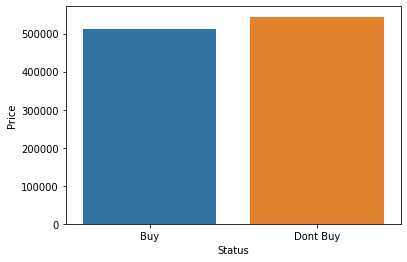

In [4]:
median_price_status = houses[['Price','Status']].groupby('Status').mean().reset_index()
sns.barplot( data=median_price_status, y='Price', x='Status' );

# Question 2: Once the houses are purchased, what is the best price to sell them? 

### Now that we have a new dataset of homes to buy, let's assume that House Rocket has purchased all homes with "Buy" Status, let's calculate their ideal resale price for each home.

### To find the ideal price, let's follow these steps:

### 2.1 - First, let's create a new column called "Season", which will contain the season that the house became available for purchase. Then let's create a DataFrame with the median price per season.

##### Note: We will use the dataset without outliers, because if in a certain season outlier houses becomes available, it will influence the price of an entire season.

In [5]:
# Load the House Rocket dataset without outliers
houses_wo = load_data.load_data("../data/without_outliers/houses_without_outliers.csv")

House Rocket dataset has been successfully loaded, has 21247 rows and 21 columns.


### Here we are going to create a new DataFrame with the average price per season.

In [6]:
houses_wo = houses_wo[ ['Price','Date'] ]

process_data.create_season_column( houses_wo ) # Function that creates the season column in "houses_wo" DF

price_season = houses_wo[ ['Price','Season'] ].groupby('Season').mean().reset_index()
price_season.columns = ['Season','Median Price Season']

In [7]:
# DataFrame with Avarage Price per Season
price_season.round(1)

,Season,Median Price Season
0,Fall,503448.8
1,Spring,514740.8
2,Summer,511177.0
3,Winter,504649.9


### 2.2 - Now in the DataFrame with only the houses purchased by House Rocket, let's create a new column "Average Total Price", which will contain the average of the following values: 
* Median price in the region (ZipCode)
* Average price for the season the house was available for purchase

In [8]:
# TODO: Join the DataFrame with only the houses purchased by House Rocket with the DataFrame with an average price per season. 

# TODO: Select only the rows where 'Status' equals 'Buy'
houses = houses.loc[ houses['Status'] == 'Buy' ]

process_data.create_season_column( houses ) # Function to create a new column called "Season" with the season the house became available for purchase

houses = pd.merge( houses, price_season, on='Season', how='inner') # Join DataFrames

# TODO: Creates a new column with the average price of price median by region and mean price by season
houses['Total Avarage Price'] = ( ( houses['Median Price ID'] + houses['Median Price Season'] ) / 2 )
houses = houses.round(1).copy() # Remove notation

### DataFrame with the new columns now looks like this:

In [9]:
houses[["ID", "Price", "ZipCode", "Median Price ID", "Season", "Median Price Season", "Total Avarage Price"]].head(2)

,ID,Price,ZipCode,Median Price ID,Season,Median Price Season,Total Avarage Price
0,3810000860,240000.0,98178,278277.0,Summer,511177.0,394727.0
1,3348401490,265000.0,98178,278277.0,Summer,511177.0,394727.0


### 2.3- Now let's create two new columns, "Sale Price" and "Profit".
#### * "Sale Price" will be the column with the recommended selling price of the house, the price recommendation will follow the following conditions:

- If the purchase price of the house is higher than the "Total Avarage Price", then the suggested selling price will be the purchase price + 10%.

- If the purchase price of the house is less than the "Total Avarage Price", then the suggested selling price will be the purchase price + 30%.

#### * "Profit" will be the profit from the resale of the house. It will be the difference between the sale price less the purchase value.

In [10]:
# TODO: Create a price column for selling the house and a profit column
houses['Sale Price'] = 0.0 
houses['Profit'] = 0.0

houses.loc[ houses['Price'] > houses['Total Avarage Price'], 'Sale Price' ] = houses['Price'] * 1.1
houses.loc[ houses['Price'] <= houses['Total Avarage Price'], 'Sale Price' ] = houses['Price'] * 1.3

houses['Profit'] = houses['Sale Price'] - houses['Price']

houses['Total Avarage Price'] = houses['Total Avarage Price'].round(1)

The final DataFrame looks like this:

In [11]:
houses[["ID", "Price", "ZipCode", "Median Price ID", "Season", "Median Price Season", "Total Avarage Price", "Sale Price", "Profit"]].head() # First five rows

,ID,Price,ZipCode,Median Price ID,Season,Median Price Season,Total Avarage Price,Sale Price,Profit
0,3810000860,240000.0,98178,278277.0,Summer,511177.0,394727.0,312000.0,72000.0
1,3348401490,265000.0,98178,278277.0,Summer,511177.0,394727.0,344500.0,79500.0
2,3992700036,415000.0,98125,425000.0,Summer,511177.0,468088.5,539500.0,124500.0
3,2926049449,384400.0,98125,425000.0,Summer,511177.0,468088.5,499720.0,115320.0
4,1787600165,396500.0,98125,425000.0,Summer,511177.0,468088.5,515450.0,118950.0


# Question 3: "When should we sell the house"?

### The answer to that question will be the best season to sell each house. But before answering it, let's look at the difference in the average price per season.

In [12]:
price_season.round(1) # Mean price per Season

,Season,Median Price Season
0,Fall,503448.8
1,Spring,514740.8
2,Summer,511177.0
3,Winter,504649.9


## After analyzing the above metrics, we can see that the difference between prices per season can reach $31,500, meaning the best season for sale is spring.

# Question 4: Should us reform the houses? If yes, which attributtes Should reform?

### First, let's see if it's really worth renovating the houses, so let's compare the average price of the houses that were not renovated and those that were.

##### Note: for this we will use the dataset without outliers, so that the outliers do not affect the analysis result.

In [13]:
# Re-Load the House Rocket dataset without outliers
houses_wo = load_data.load_data("../data/without_outliers/houses_without_outliers.csv")

House Rocket dataset has been successfully loaded, has 21247 rows and 21 columns.


In [14]:
# TODO: Create a new column with information if the house has already been renovated or not.
houses_wo['Renovated'] = 'No' 
houses_wo.loc[ houses_wo['Year Renovated'] != 0, 'Renovated'] = 'Yes'

In [15]:
# TODO: Show metrics comparing renovated homes and unrenovated homes.
renovated_comparation = houses_wo[['Price','Renovated']].groupby('Renovated').mean().reset_index().round(1) 
print('Avarage price of renovated houses $ {}'.format( renovated_comparation.iloc[1,1] ) )
print('Average price of unrenovated houses $ {}'.format( renovated_comparation.iloc[0,1] ) )
print('The difference is $ {}, acress of {:.2f}%'.format(
    renovated_comparation.iloc[1,1] - renovated_comparation.iloc[0,1],
    ( ( ( renovated_comparation.iloc[1,1] - renovated_comparation.iloc[0,1] ) * 100 ) / renovated_comparation.iloc[1,1] )
) )

Avarage price of renovated houses $ 651781.5
Average price of unrenovated houses $ 503012.3
The difference is $ 148769.2, acress of 22.83%


### After seeing the margin of price difference between renovated and unrenovated homes, it is clear that renovated homes have a higher average and median price, in both cases an increase of approximately 20%. So now let's see which attributes are most important to renovate the house.

In [16]:
# TODO: Create a new DataFrame with renovated houses only
corr = houses_wo.loc[ houses_wo['Renovated'] != 0 ].corr()

corr['Price'].sort_values( ascending=False ) # Show the variables with the most correlation with Price

Price             1.000000
Grade             0.673951
Sqft Living       0.669080
Sqft Living 15    0.598269
Sqft Above        0.570982
Bathrooms         0.497622
Latitude          0.381467
View              0.324330
Bedrooms          0.313093
Sqft Basement     0.282128
Floors            0.277596
Year Renovated    0.111432
Waterfront        0.111261
Sqft Lot          0.095190
Sqft Lot 15       0.089356
Year Built        0.060906
Longitude         0.045860
Condition         0.039280
ID               -0.003901
ZipCode          -0.035342
Name: Price, dtype: float64

After analyzing the table above, we can see that the attribute that has the most correlation with Price and that can be added in a renovation is the bathroom.

Another attribute that also has a high correlation with the price of renovated homes is the Living Square Foot. So the best decision to renovate the house would be to build a bathroom as a new addition, increasing the number of bathrooms in the house and the Square Foot of the House itself.

According homeguide.com, the construction of a bathroom as a new addition costs on average 22,000.00. A high price, but as seen, the average price of a renovated house can be up to 22% higher than an unrenovated house

## Now let's add two new columns, "Renovation Sale Price", which will contain the recommended selling price of the home after renovation. The other column will be "Profit Renovation", which will contain the profit from the renovated houses.

In [17]:
# TODO: Create a new column with the sale price + 20% after renovation
houses['Renovation Sale Price'] = ( houses['Sale Price'] * 1.20 ).round(1)

# TODO: Create a new column with the post-reform profit
houses['Profit Renovation'] = ( houses['Renovation Sale Price'] - houses['Price'] ).round(1)

# TODO: 
houses = houses.round(1) # Revmoce Scientific Notation of all dataframe

houses.to_csv("../reports/data/final_houses_sale.csv", index=False) # Save data in reports folder

houses[["ID", "Price", "Status", "ID", "Median Price ID", "Season", "Median Price Season", "Total Avarage Price", "Sale Price", "Profit", "Renovation Sale Price", "Profit Renovation"]].head() # Final DataFrame

,ID,Price,Status,ID,Median Price ID,Season,Median Price Season,Total Avarage Price,Sale Price,Profit,Renovation Sale Price,Profit Renovation
0,3810000860,240000.0,Buy,3810000860,278277.0,Summer,511177.0,394727.0,312000.0,72000.0,374400.0,134400.0
1,3348401490,265000.0,Buy,3348401490,278277.0,Summer,511177.0,394727.0,344500.0,79500.0,413400.0,148400.0
2,3992700036,415000.0,Buy,3992700036,425000.0,Summer,511177.0,468088.5,539500.0,124500.0,647400.0,232400.0
3,2926049449,384400.0,Buy,2926049449,425000.0,Summer,511177.0,468088.5,499720.0,115320.0,599664.0,215264.0
4,1787600165,396500.0,Buy,1787600165,425000.0,Summer,511177.0,468088.5,515450.0,118950.0,618540.0,222040.0
